In [164]:
from matplotlib import pyplot as plt
import numpy as np


plt.rcParams['figure.figsize'] = (50, 15)
plt.rcParams['font.size'] = 20


After learning with all features on all data

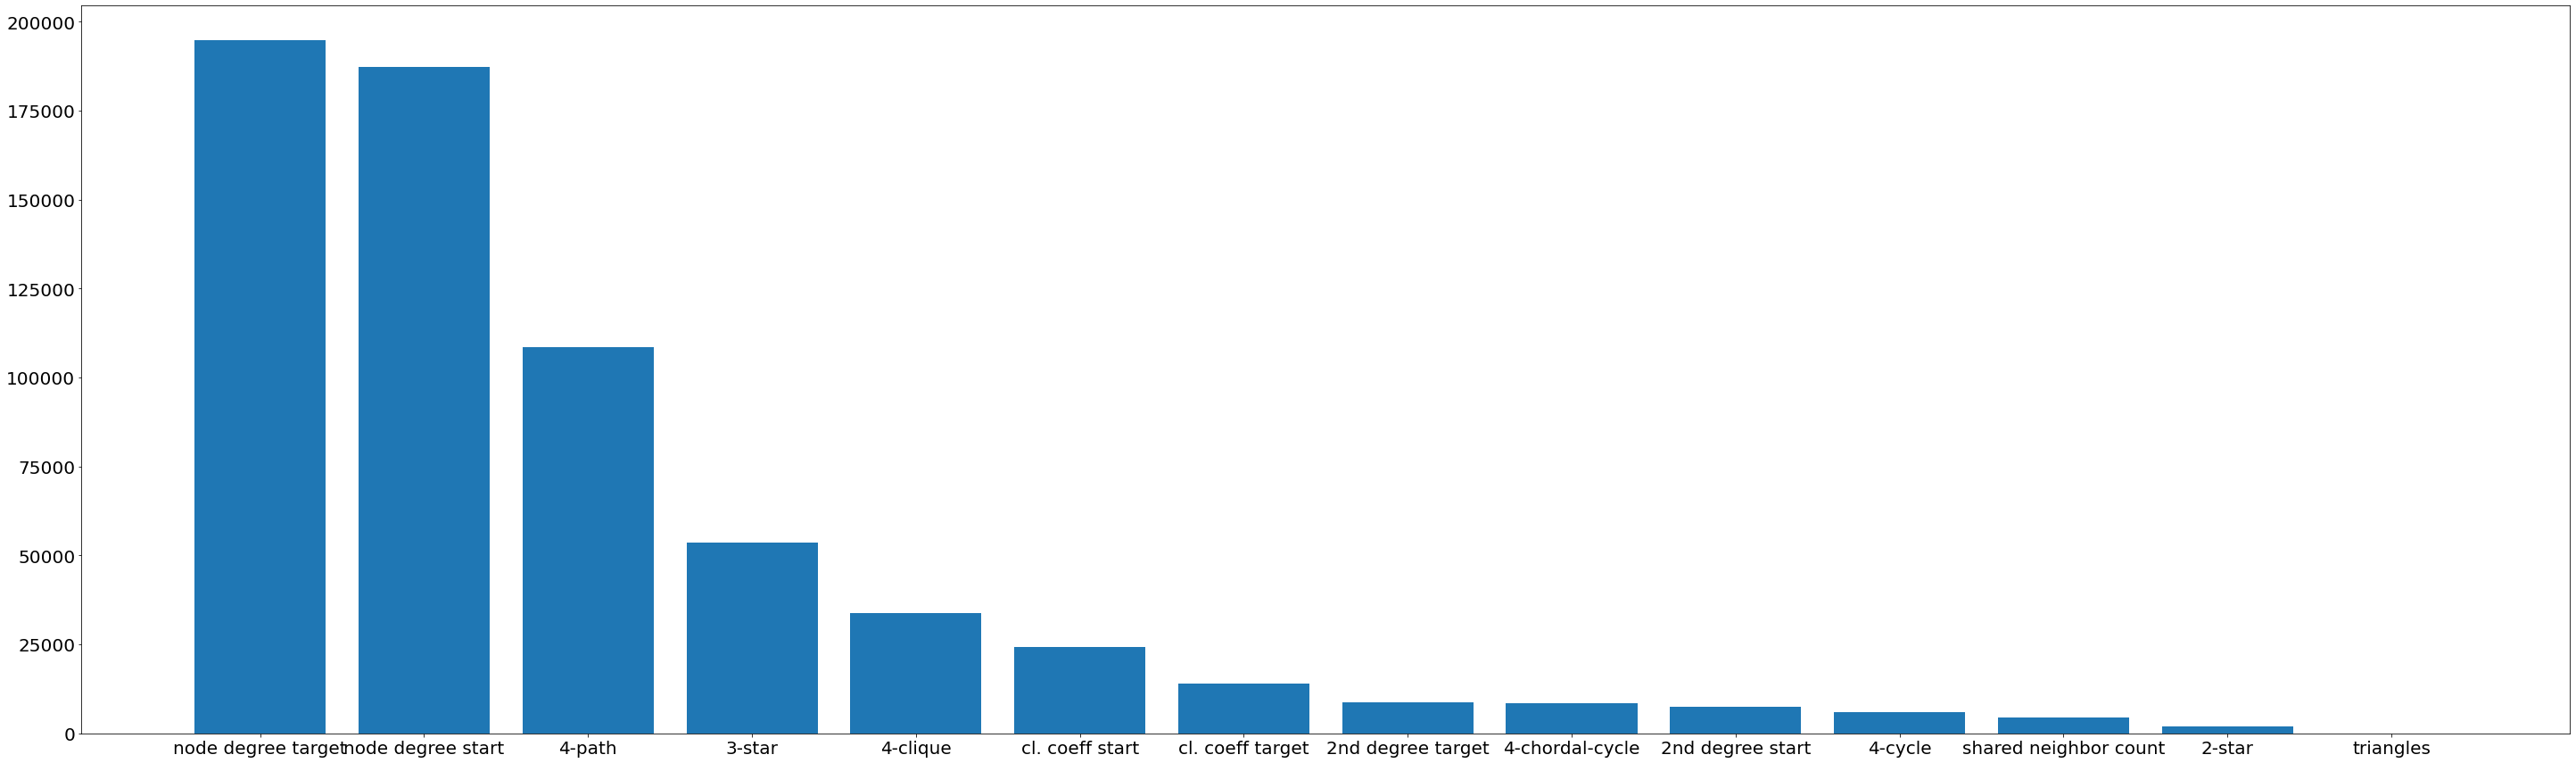

In [165]:
scores = {	"f0":      187300,
			"f1":      194769,
			"f2":      4553.22,
			"f3":      24206.3,
			"f4":      13875.2,
			"f5":      0.231468,
			"f6":      2004.18,
			"f7":      33694.4,
			"f8":      8439.71,
			"f10":     5875.42,
			"f11":     53688.3,
			"f12":     108490,
			"f13":     7406.33,
			"f14":     8723.48}

names = [	'node degree start',
			'node degree target',
			'shared neighbor count',
			'cl. coeff start',
			'cl. coeff target',
			'triangles',
			'2-star',
			'4-clique',
			'4-chordal-cycle',
			#'rel. 4-tailed-triangle',
			'4-cycle',
			'3-star',
			'4-path',
			'2nd degree start',
			'2nd degree target'
		]

names = np.array(names)
scores = np.array(list(scores.values()))
sorting = np.argsort(scores)[::-1]
plt.bar(x=names[sorting], height=scores[sorting])
plt.show()

-------------------------- booster evaluation --------------------------<br>
Overall matched edges: 683892<br>
There were 177818 edges wrong clustered.<br>
There were 567524 edges wrong not clustered.<br>
Error: 0.0598442<br>

Drop in inverse magnitude order:
'relative shared neighbor count',
'rel. triangles',
'rel. 2-star',
'rel. 4-chordal-cycle',
'rel. 4-tailed-triangle',
'rel. 4-cycle',
'rel. 2nd degree start',
'rel. 2nd degree target'

In [166]:
print(f"false positive rate: {177818/683892}")

false positive rate: 0.2600088902926193


In [167]:
labels = []
with open('../data/all.data') as file:
	for line in file:
		labels.append(int(line[0]))

In [168]:
probs = []
with open('all_predictions') as file:
	for line in file:
		probs.append(float(line))

In [169]:
labels = np.array(labels)
probs = np.array(probs)

In [170]:
positive_probs = probs[labels == 1]
negative_probs = probs[labels == 0]

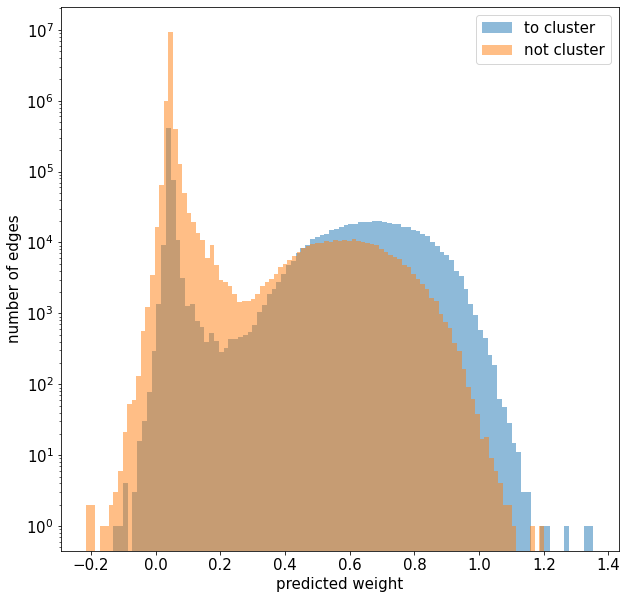

In [176]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 15
plt.hist(positive_probs, bins=100, alpha=0.5, label="to cluster")
plt.hist(negative_probs, bins=100, alpha=0.5, label='not cluster')
plt.yscale("log")
plt.xlabel('predicted weight')
plt.ylabel('number of edges')
plt.legend()
plt.show()

In [172]:
training_errors = [	0.388597, 0.320000, 0.279916, 0.257792, 0.245964, 0.239553, 0.236235, 0.234517, 0.233553, 0.233024, 0.232656, 0.232353, 0.232182, 0.232040, 0.231972, 0.231903, 0.231807, 0.231740, 0.231649, 0.231554, 0.231491, 0.231431, 0.231340, 0.231295, 0.231231, 0.231186, 0.231119, 0.231083, 0.231022, 0.230991]

In [173]:
testing_errors = [	0.388591, 0.319990, 0.279914, 0.257785, 0.245960, 0.239559, 0.236237, 0.234523, 0.233565, 0.233037, 0.232680, 0.232381, 0.232218, 0.232083, 0.232020, 0.231962, 0.231870, 0.231809, 0.231723, 0.231636, 0.231581, 0.231527, 0.231443, 0.231403, 0.231347, 0.231307, 0.231242, 0.231207, 0.231156, 0.231131]

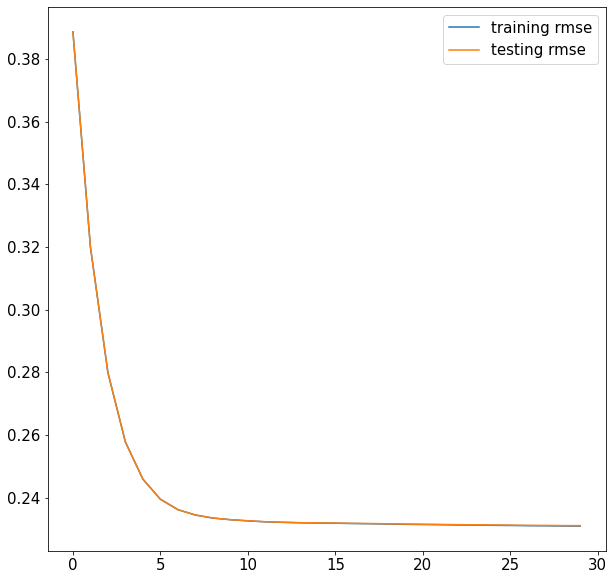

In [174]:
plt.plot(training_errors, label="training rmse")
plt.plot(testing_errors, label="testing rmse")
plt.legend()

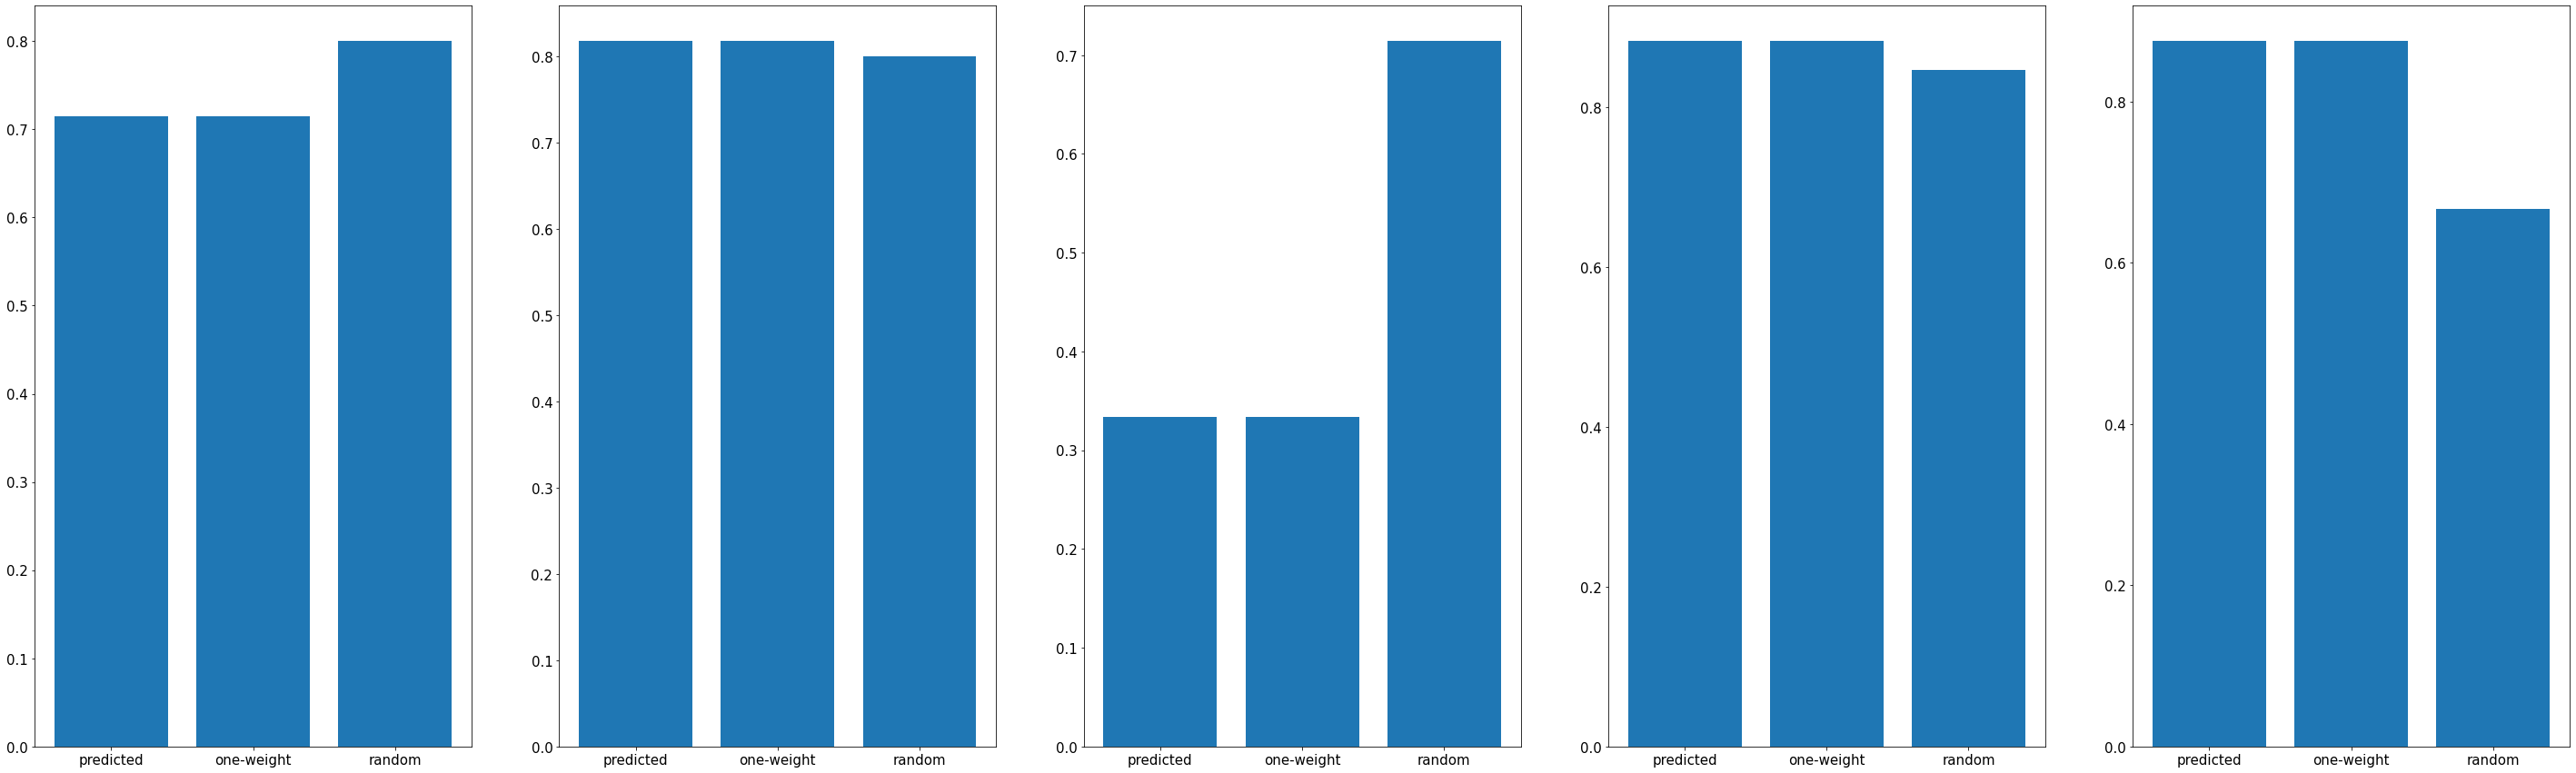

In [175]:
plt.rcParams['figure.figsize'] = (50, 15)

conductances = np.array([	[0.714286, 0.714286, 0.8],
							[0.818182, 0.818182, 0.8],
							[0.333333, 0.333333, 0.714286],
							[0.882353, 0.882353, 0.846154],
							[0.875, 0.875, 0.666667]])
names = ['citeseer', 'cora', 'ppi', 'pubmed', 'reddit']

fig, ax = plt.subplots(ncols=5)
for i in range(5):
	ax[i].bar(x=["predicted", "one-weight", "random"], height=conductances[i])
